In [36]:
#Importing librarries required

import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE,SMOTEN
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV,StratifiedKFold,cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score,roc_curve,roc_auc_score,confusion_matrix,precision_recall_curve,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA


In [37]:
df_comp=pd.read_csv("BANKRUPTCY_PREDICTION .csv") #Reading the csv dataset as pandas data frame 

In [38]:
df_comp.head(20)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.

In [39]:
df_comp.columns #Displaying list of columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [40]:
df_comp.columns=[cols.replace(' ','_')for cols in df_comp.columns]

In [41]:
df_comp.shape

(6819, 95)

In [42]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 1   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 2   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 3   _Operating_Gross_Margin                                   6819 non-null   float64
 4   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 5   _Operating_Profit_Rate                                    6819 non-null   float64
 6   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 7   _After-tax_net_Interest_Rate                              6819 non-null   float64
 8   _Non-industry_inco

In [43]:
print(df_comp['Bankrupt'].value_counts())
df_comp['Bankrupt'].value_counts(normalize=True)

0    6599
1     220
Name: Bankrupt, dtype: int64


0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64

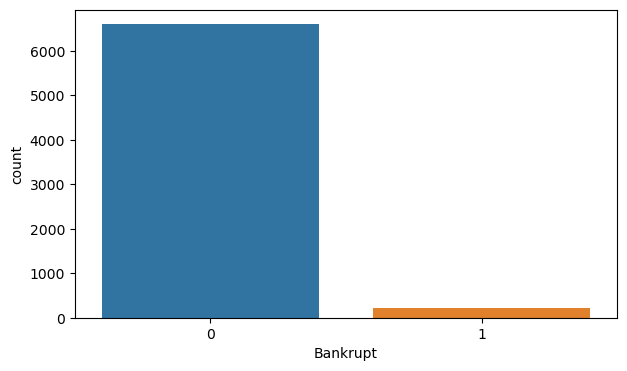

In [44]:
plt.figure(figsize=(7,4))
sns.countplot(x='Bankrupt',data=df_comp)
plt.show()

In [45]:
df_comp.describe()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest-bearing_debt_interest_rate,_Tax_rate_(A),_Net_Value_Per_Share_(B),_Net_Value_Per_Share_(A),_Net_Value_Per_Share_(C),_Persistent_EPS_in_the_Last_Four_Seasons,_Cash_Flow_Per_Share,_Revenue_Per_Share_(Yuan_�,_Operating_Profit_Per_Share_(Yuan_�,_Per_Share_Net_profit_before_tax_(Yuan_�,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_After-tax_Net_Profit_Growth_Rate,_Regular_Net_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_%,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt/Total_net_worth,_Debt_ratio_%,_Net_worth/Assets,_Long-term_fund_suitability_ratio_(A),_Borrowing_dependency,_Contingent_liabilities/Net_worth,_Operating_profit/Paid-in_capital,_Net_profit_before_tax/Paid-in_capital,_Inventory_and_accounts_receivable/Net_value,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_(times),_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_(times),_Revenue_per_person,_Operating_profit_per_person,_Allocation_rate_per_person,_Working_Capital_to_Total_Assets,_Quick_Assets/Total_Assets,_Current_Assets/Total_Assets,_Cash/Total_Assets,_Quick_Assets/Current_Liability,_Cash/Current_Liability,_Current_Liability_to_Assets,_Operating_Funds_to_Liability,_Inventory/Working_Capital,_Inventory/Current_Liability,_Current_Liabilities/Liability,_Working_Capital/Equity,_Current_Liabilities/Equity,_Long-term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income/Total_expense,_Total_expense/Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Working_capitcal_Turnover_Rate,_Cash_Turnover_Rate,_Cash_Flow_to_Sales,_Fixed_Assets_to_Assets,_Current_Liability_to_Liability,_Current_Liability_to_Equity,_Equity_to_Long-term_Liability,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability-Assets_Flag,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.7

In [46]:
#Checking for duplicate rows
df_comp.duplicated().sum()


0

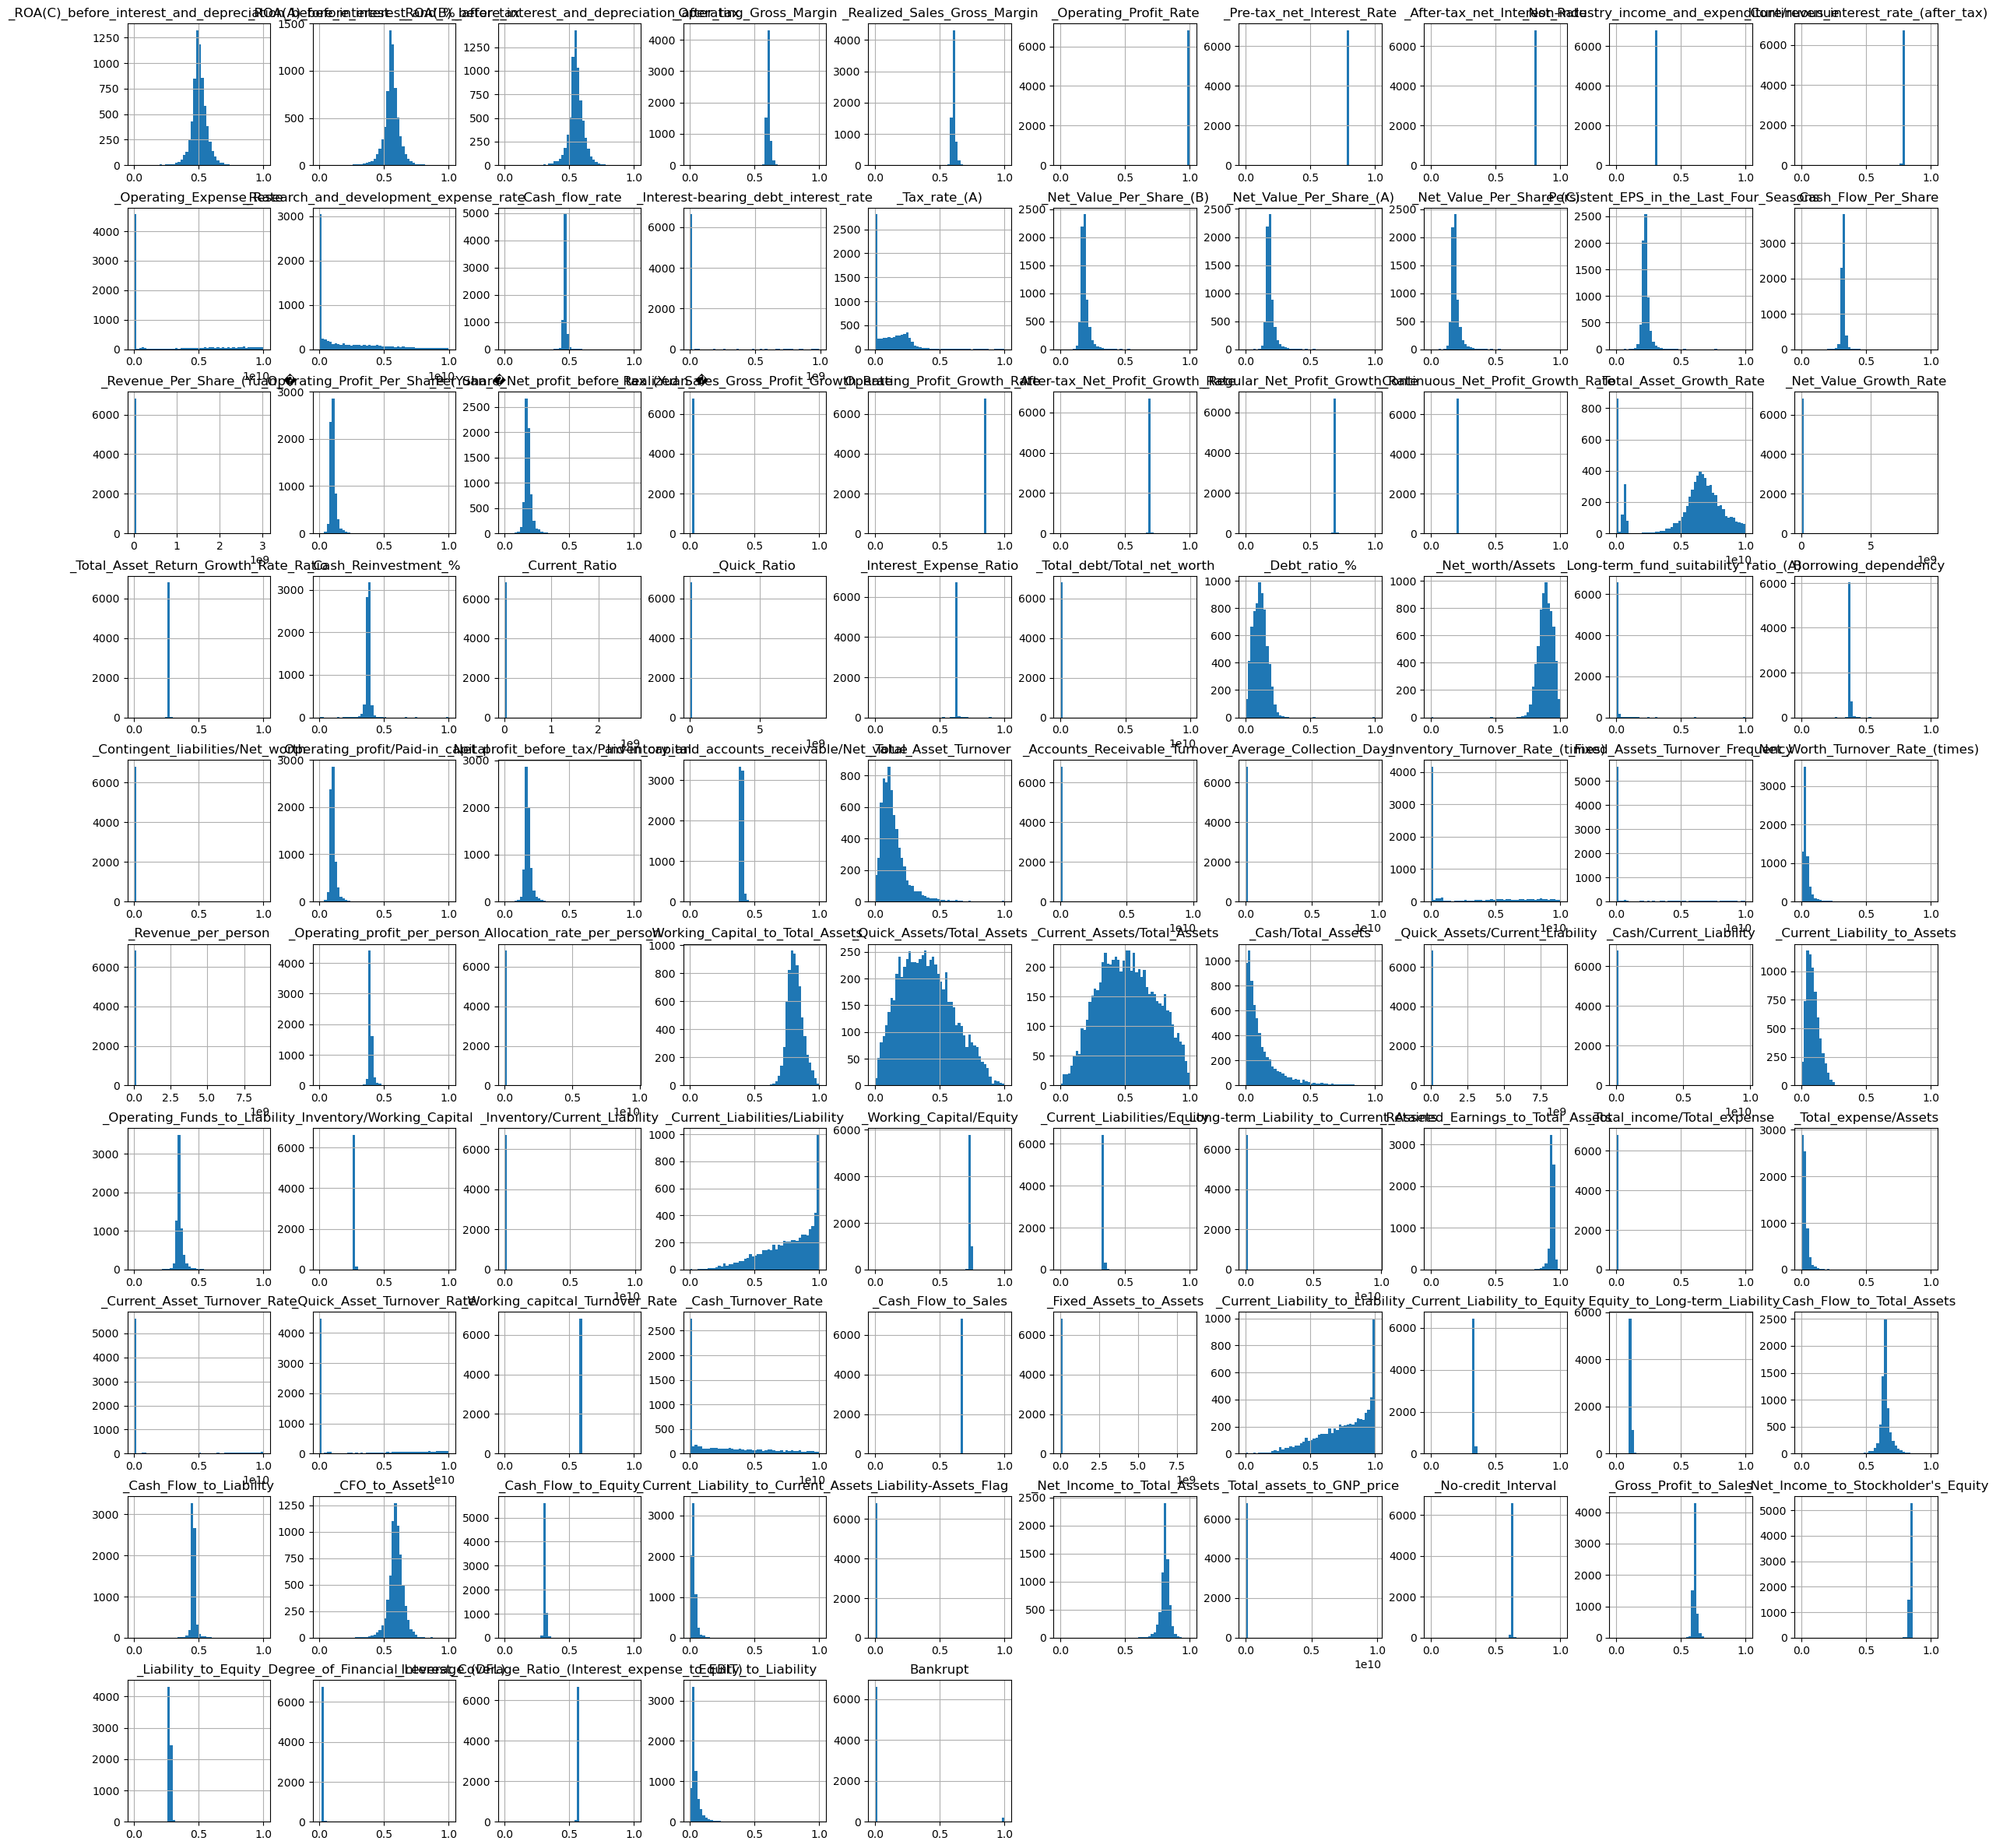

In [47]:
df_comp.hist(figsize=(30,30),bins=50) #Distribution of features
plt.show()

<Axes: >

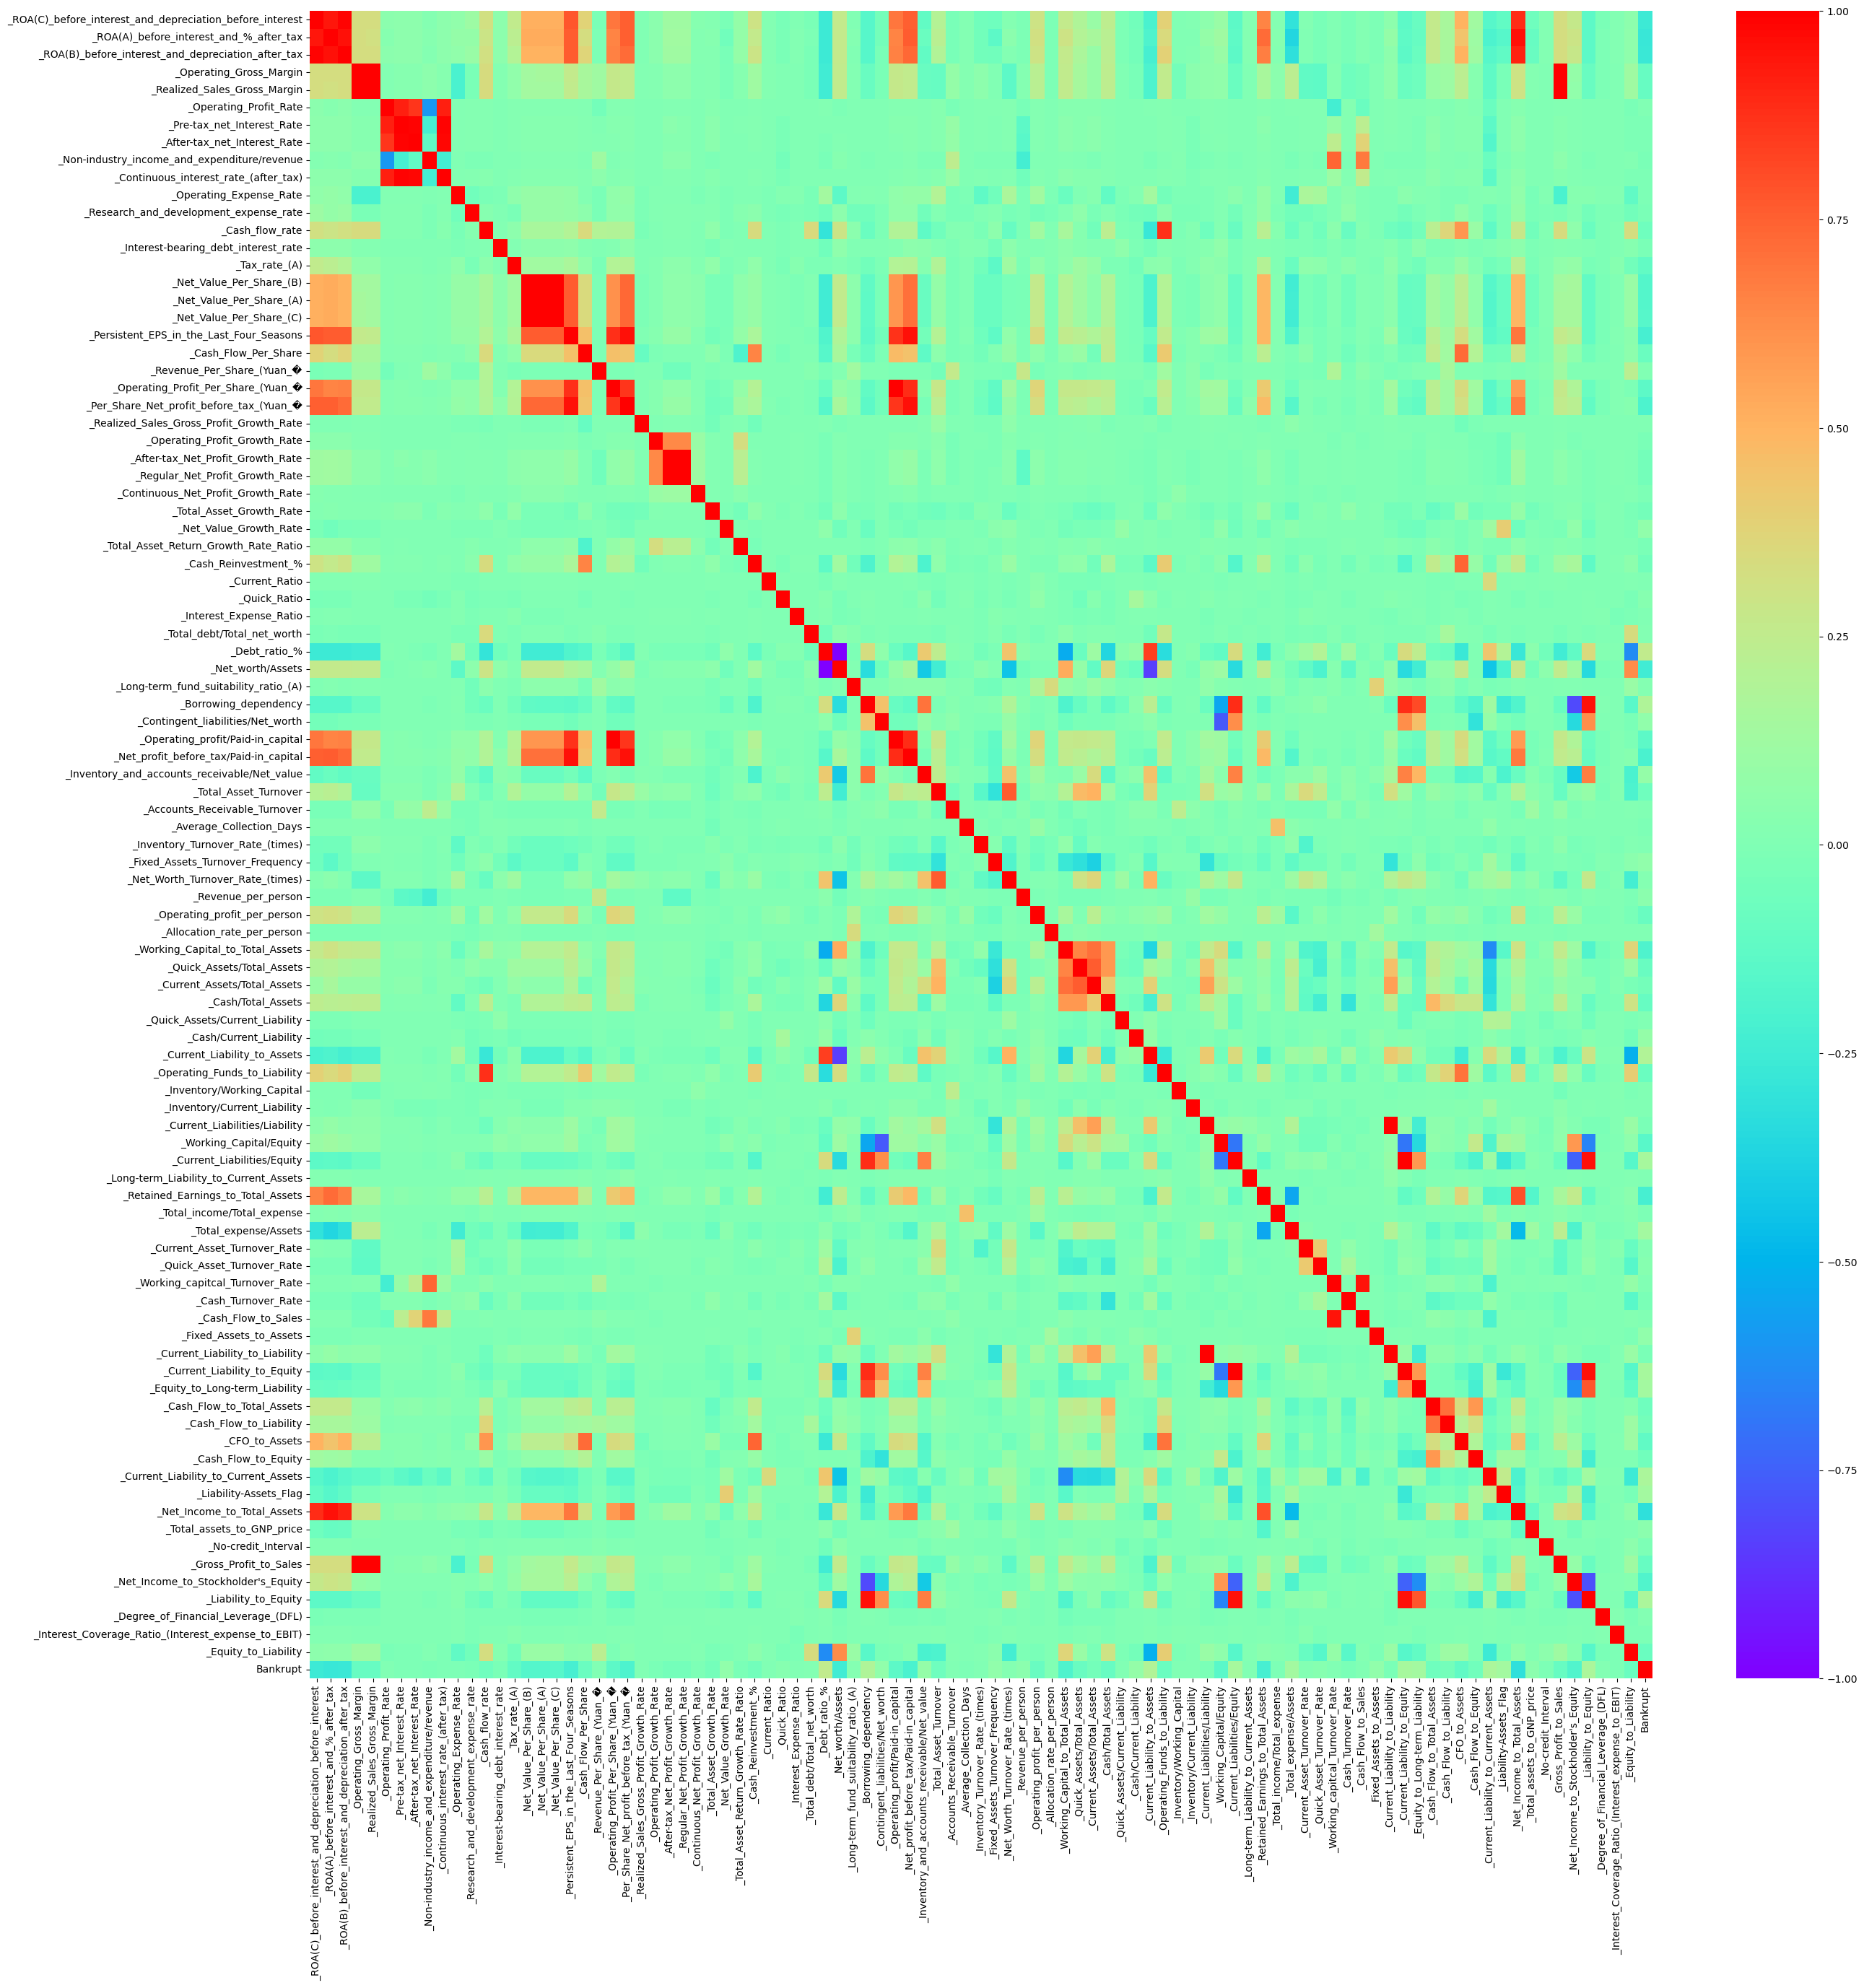

In [48]:
mat_corr=df_comp.corr().round(2)
plt.figure(figsize=(30,30))
sns.heatmap(mat_corr,cmap='rainbow')

def drop_highcorr_columns(df,corr_threshold=0.9):
    features_corr=set()
    corr=df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>corr_threshold:
                   features_corr.add(corr.columns[i])
                    
                 
    df=df.drop(columns=list(features_corr),axis=1)
    return df

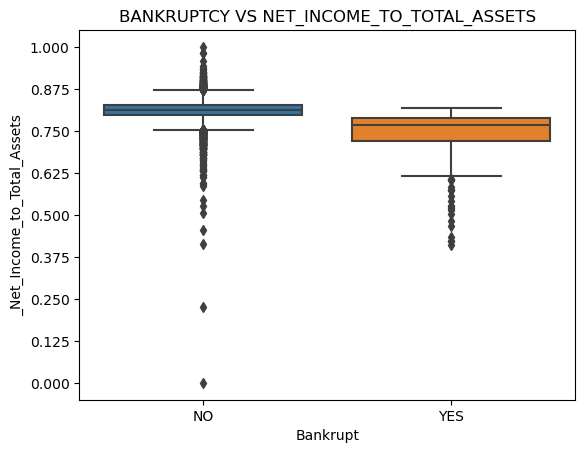

In [49]:
sns.boxplot(x='Bankrupt',y="_Net_Income_to_Total_Assets",data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('BANKRUPTCY VS NET_INCOME_TO_TOTAL_ASSETS')
plt.show()

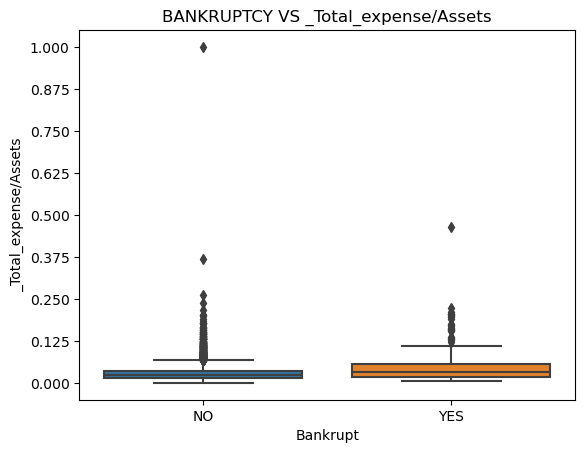

In [50]:
sns.boxplot(x='Bankrupt',y='_Total_expense/Assets',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('BANKRUPTCY VS _Total_expense/Assets')
plt.show()

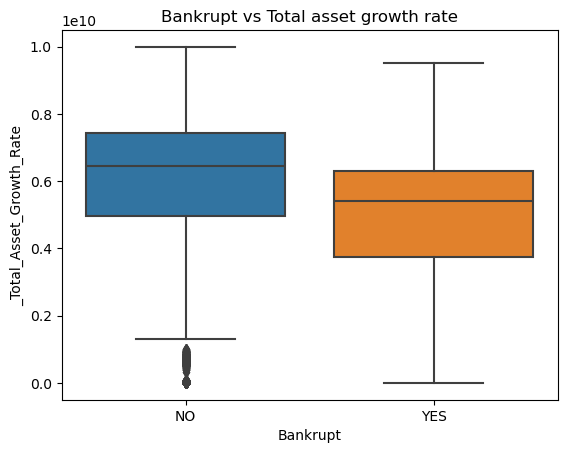

In [51]:
sns.boxplot(x='Bankrupt',y='_Total_Asset_Growth_Rate',data=df_comp)
plt.xticks([0,1],['NO','YES'])
plt.title("Bankrupt vs Total asset growth rate")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

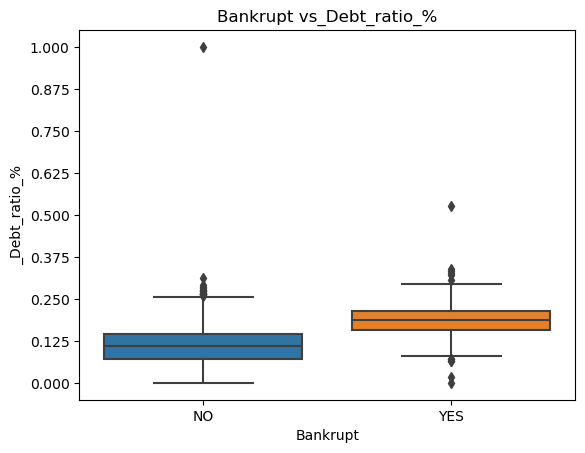

In [52]:
sns.boxplot(x='Bankrupt',y='_Debt_ratio_%',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title("Bankrupt vs_Debt_ratio_%")
plt.show

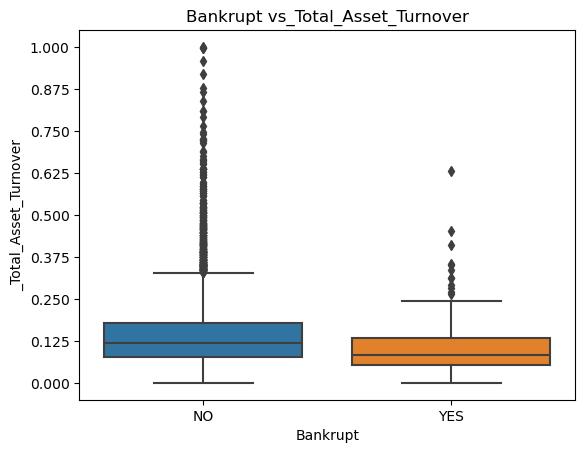

In [53]:
sns.boxplot(x='Bankrupt',y='_Total_Asset_Turnover',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('Bankrupt vs_Total_Asset_Turnover')
plt.show()

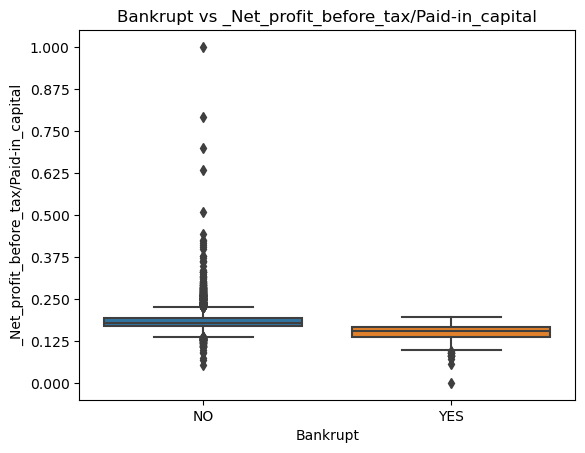

In [54]:
sns.boxplot(x='Bankrupt',y='_Net_profit_before_tax/Paid-in_capital',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('Bankrupt vs _Net_profit_before_tax/Paid-in_capital')
plt.show()

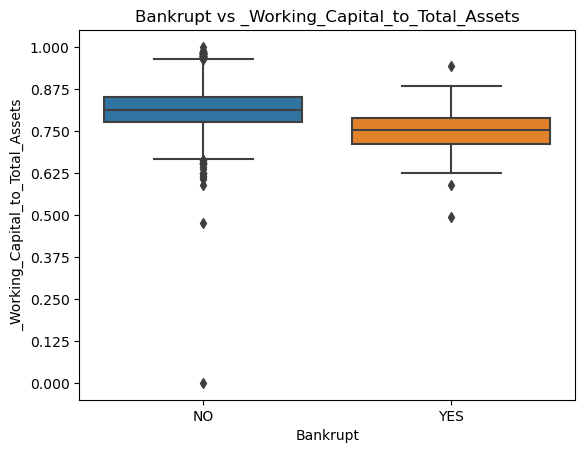

In [55]:
sns.boxplot(x='Bankrupt',y='_Working_Capital_to_Total_Assets',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('Bankrupt vs _Working_Capital_to_Total_Assets')
plt.show()

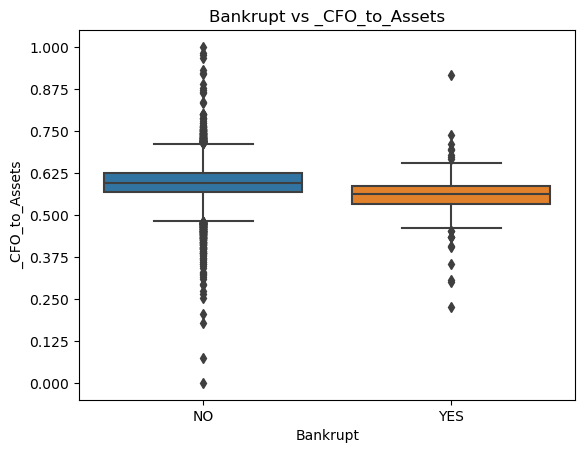

In [56]:
sns.boxplot(x='Bankrupt',y='_CFO_to_Assets',data=df_comp)
plt.yticks([i for i in np.linspace(0,1.0,9)])
plt.xticks([0,1],['NO','YES'])
plt.title('Bankrupt vs _CFO_to_Assets')
plt.show()

# Preprocessing

In [57]:
x=df_comp.drop(['Bankrupt'],axis=1)
y=df_comp['Bankrupt']                           #Seperating input features and output label

In [58]:
def sqrt_trans(data):              #Function to reduce the skewness in input data x
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.sqrt(data[col])
            
        else:
            continue
            
    return data




In [59]:
x_num=x.drop('_Liability-Assets_Flag',axis=1)   #keeping aside numerical categorical column Liability asset flag for applying trasformations
x_num=sqrt_trans(x_num)
transformer=PowerTransformer(standardize=False)
x_num=pd.DataFrame(transformer.fit_transform(x_num),columns=x_num.columns,index=x.index)
sscaler=StandardScaler()               #Standardization of columns
x_scaled=pd.DataFrame(sscaler.fit_transform(x_num),columns=x_num.columns,index=x_num.index)
x_scaled['_Liability-Assets_Flag']=x['_Liability-Assets_Flag'] #Adding back the numerical categorical column after transformatiion



# Model building

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=42)
                                                                #spliting data as training set and testing set

In [61]:
y_train.value_counts()

0    5279
1     176
Name: Bankrupt, dtype: int64

In [62]:
sm = SMOTE(random_state = 42,sampling_strategy=0.65)       #Over sampling using SMOTE
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train) 

In [63]:
kn=KNeighborsClassifier()
sgd=SGDClassifier(random_state=42)
lg=LogisticRegression(random_state=42)
sv=SVC(random_state=42)
rf=RandomForestClassifier(random_state=42)         #List of model objects
dt=DecisionTreeClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
gb=GradientBoostingClassifier(random_state=42)
xgbc=XGBClassifier(random_state=42)

In [64]:
list_models=[kn,sgd,lg,sv,rf,dt,ada,gb,xgbc]


In [65]:
for i in list_models:
    y_train_smote_pred=cross_val_predict(i,x_train_smote,y_train_smote,cv=5)
    print(i)
    print(classification_report(y_train_smote,y_train_smote_pred))     #Models training using cross validation
    print(confusion_matrix(y_train_smote,y_train_smote_pred))
    print(roc_auc_score(y_train_smote,y_train_smote_pred))
    print('*'*50)

    

                    

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      5279
           1       0.88      1.00      0.94      3431

    accuracy                           0.95      8710
   macro avg       0.94      0.96      0.95      8710
weighted avg       0.95      0.95      0.95      8710

[[4828  451]
 [   0 3431]]
0.9572835764349308
**************************************************
SGDClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5279
           1       0.85      0.83      0.84      3431

    accuracy                           0.87      8710
   macro avg       0.87      0.87      0.87      8710
weighted avg       0.87      0.87      0.87      8710

[[4761  518]
 [ 583 2848]]
0.8659770247195696
**************************************************
LogisticRegression(random_state=42)
              precision    recall  f1-score   support

       

KNeighborsClassifier() ***************
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.20      0.64      0.31        44

    accuracy                           0.91      1364
   macro avg       0.59      0.78      0.63      1364
weighted avg       0.96      0.91      0.93      1364

F1 score is: 0.30601092896174864
******************************
SGDClassifier(random_state=42) ***************
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1320
           1       0.22      0.80      0.35        44

    accuracy                           0.90      1364
   macro avg       0.61      0.85      0.65      1364
weighted avg       0.97      0.90      0.93      1364

F1 score is: 0.3465346534653465
******************************
LogisticRegression(random_state=42) ***************
              precision    recall  f1-score   support

           0       0.99   

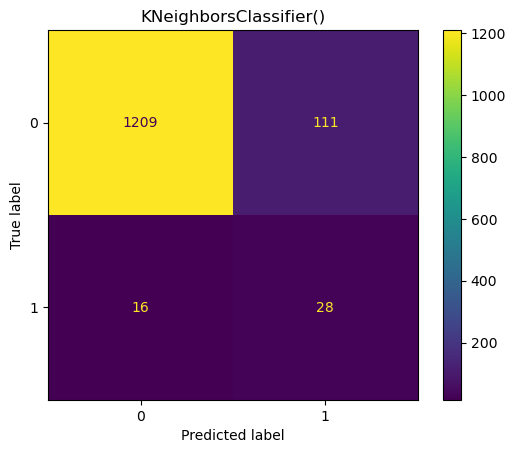

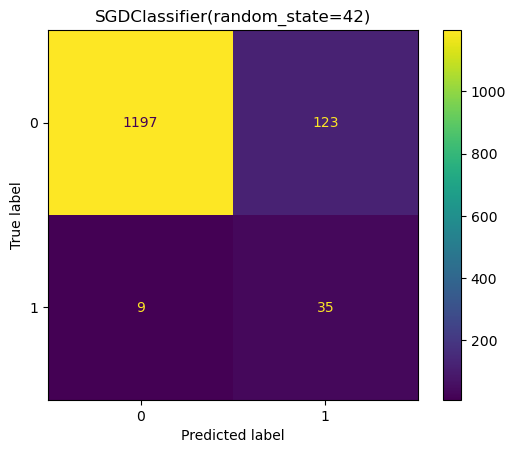

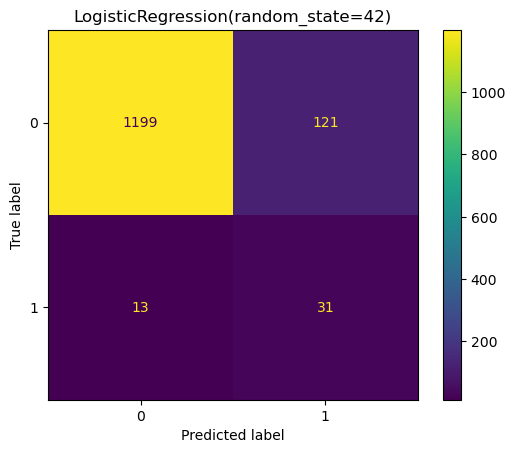

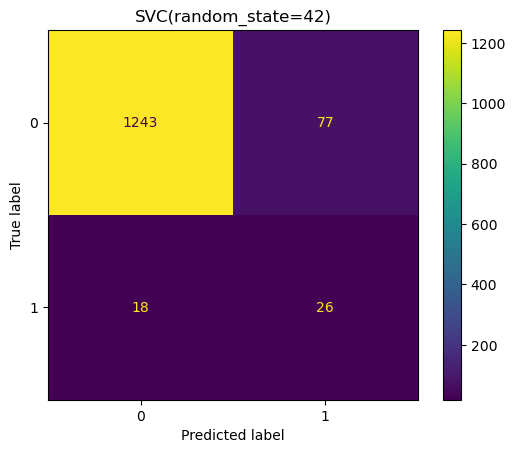

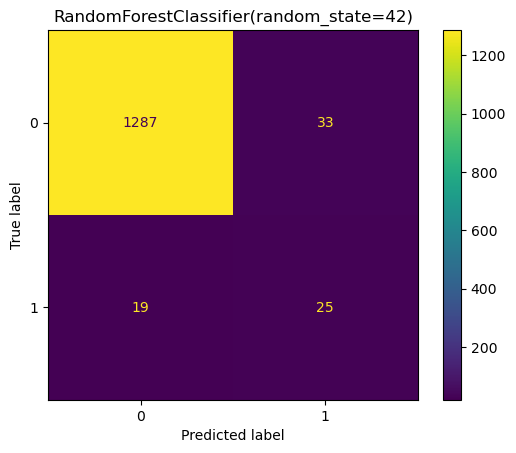

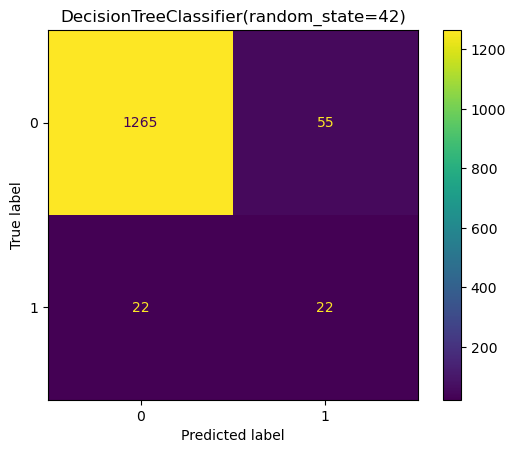

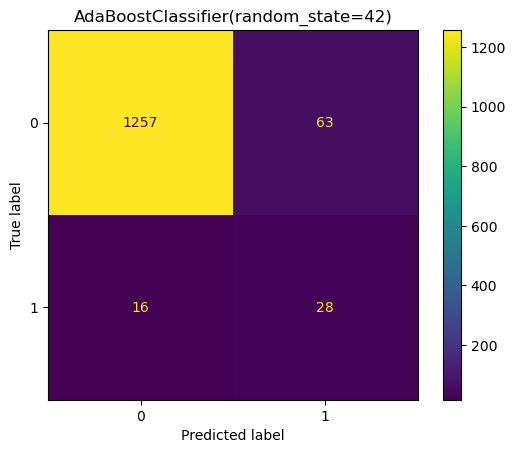

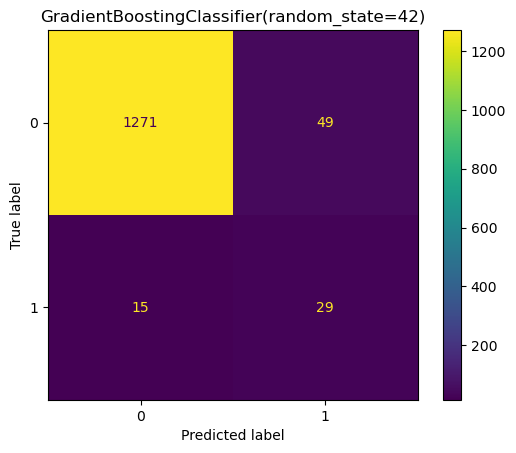

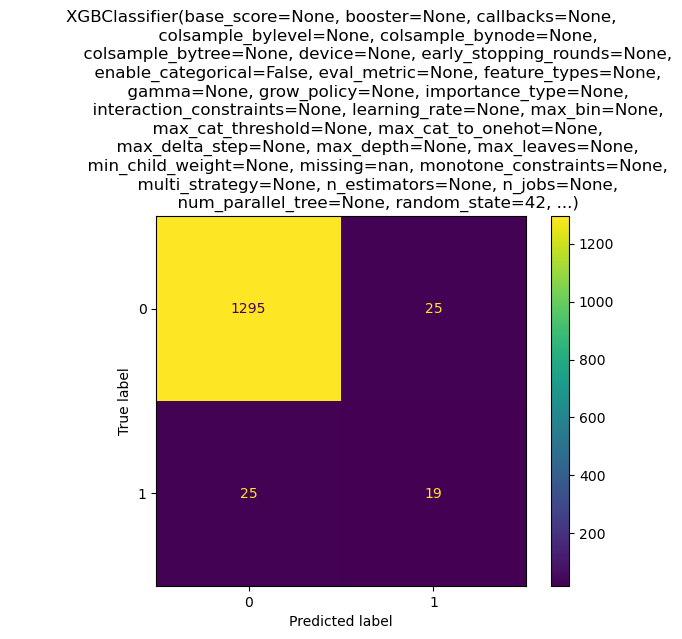

In [66]:
for model in list_models:
    model.fit(x_train_smote,y_train_smote)
    y_test_pred=model.predict(x_test)
    print(model,'*'*15)
    print(classification_report(y_test,y_test_pred))                 #Model evaluation on test set
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    plt.title(model)
    print('F1 score is:',f1_score(y_test,y_test_pred))
    print('*'*30)

# Voting classifier

In [67]:
voting_clf=VotingClassifier(estimators=[('lg',LogisticRegression(random_state=42)),
                                        ('rf',RandomForestClassifier(random_state=42)),
                                        ('gb',GradientBoostingClassifier(random_state=42)),
                                        ('xg',XGBClassifier(random_state=42))],voting='soft')
voting_clf.fit(x_train_smote,y_train_smote)
                            

VotingClassifier(estimators=[('lg', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_cat...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.46      0.66      0.54        44

    accuracy                           0.96      1364
   macro avg       0.72      0.82      0.76      1364
weighted avg       0.97      0.96      0.97      1364
 
 F1-score: 0.5420560747663551


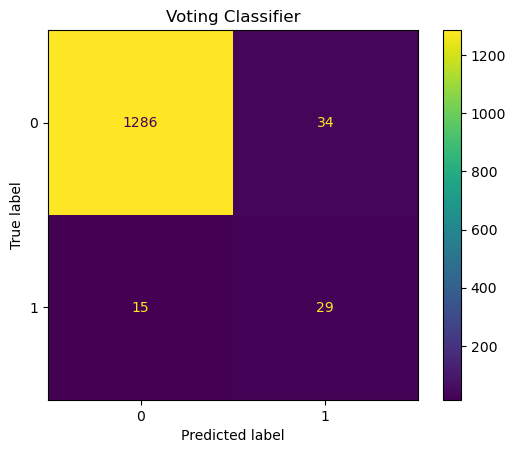

In [68]:
y_test_pred_vc=voting_clf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_vc)
plt.title('Voting Classifier')                                                 #Voting classifier evaluation
print(classification_report(y_test,y_test_pred_vc),'\n','F1-score:',f1_score(y_test,y_test_pred_vc))

In [69]:
best_models=[lg,rf,gb,xgbc,voting_clf]
best_models_names=['Logistic','Random Forest','Gradient Boosting', 'XG Boosting', 'Voting Classifier']

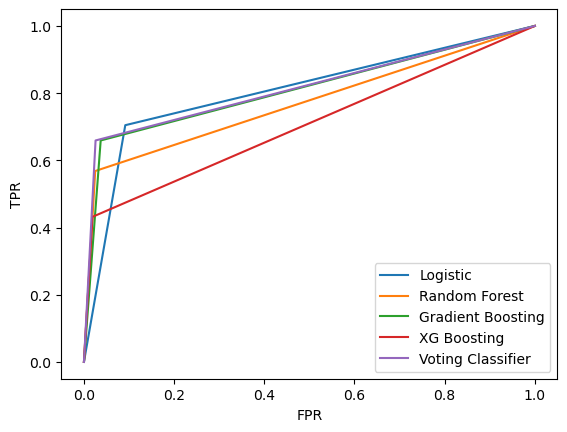

In [70]:
for model,name in zip(best_models,best_models_names):
    fpr,tpr,_=roc_curve(y_test,model.predict(x_test))
    plt.plot(fpr,tpr,label=name)                                  #ROC-AUC CURVE
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [71]:
for model,name in zip(best_models,best_models_names):
    print('Model:',name,'\n','ROC-AUC_SCORE:', roc_auc_score(y_test,model.predict(x_test)))
    print('*'*30)                                                     #MODELS  FIANL COMPARISION

Model: Logistic 
 ROC-AUC_SCORE: 0.8064393939393939
******************************
Model: Random Forest 
 ROC-AUC_SCORE: 0.7715909090909091
******************************
Model: Gradient Boosting 
 ROC-AUC_SCORE: 0.8109848484848485
******************************
Model: XG Boosting 
 ROC-AUC_SCORE: 0.706439393939394
******************************
Model: Voting Classifier 
 ROC-AUC_SCORE: 0.8166666666666668
******************************


VOTING CLASSIFIER is so far the best for this problem. ........................THANK YOU